In [3]:
# Exercise 1
def sum(n: int) -> int:
    if (n <= 0):
        return 0
    return n + sum(n-1)


def is_odd(num: int) -> str:
    if (num & 1 == 0):
        return "Even"
    return "Odd"

In [4]:
sum(10)

55

In [5]:
is_odd(3)

'Odd'

In [6]:
import numpy as np
import openpyxl

file = openpyxl.load_workbook("./data_set_train.xlsx")
ws = file.active

data = []
col = []

for row in ws.iter_rows(max_row=1):
  for cell in row:
    col.append(cell.value)

for row in ws. iter_rows(min_row=2):
  ls = []
  for cell in row:
    ls.append(cell.value)
  data.append(ls)

In [7]:
arr = np.array(data)
arr.shape

(17400, 29)

In [8]:
data_set = arr[:,:9] # 모든 행에서 첫 9개 
data_set

array([['강남역우정에쉐르', '2006Q1', '9000.0', ..., '7.0', '37.4942041',
        '127.0435446'],
       ['강남역우정에쉐르', '2006Q1', '9000.0', ..., '7.0', '37.4942041',
        '127.0435446'],
       ['개포주공1단지', '2006Q1', '73000.0', ..., '3.0', '37.4784072',
        '127.061375'],
       ...,
       ['현대하이츠', '2017Q3', '64000.0', ..., '1.0', '37.4913789',
        '127.0348797'],
       ['현대한강', '2017Q3', '170000.0', ..., '8.0', '37.5246752',
        '127.056226'],
       ['현대한강', '2017Q3', '170000.0', ..., '8.0', '37.5246752',
        '127.056226']], shape=(17400, 9), dtype='<U32')

In [9]:
# Exercise 2
data_set2006 = data_set[data_set[:,1] <= "2006Q4",:]
data_set2006

array([['강남역우정에쉐르', '2006Q1', '9000.0', ..., '7.0', '37.4942041',
        '127.0435446'],
       ['강남역우정에쉐르', '2006Q1', '9000.0', ..., '7.0', '37.4942041',
        '127.0435446'],
       ['개포주공1단지', '2006Q1', '73000.0', ..., '3.0', '37.4784072',
        '127.061375'],
       ...,
       ['현대빌라트', '2006Q4', '125000.0', ..., '3.0', '37.5179279',
        '127.0428004'],
       ['현대빌라트', '2006Q4', '125000.0', ..., '3.0', '37.5179279',
        '127.0428004'],
       ['현대빌라트', '2006Q4', '125000.0', ..., '3.0', '37.5179279',
        '127.0428004']], shape=(2617, 9), dtype='<U32')

In [10]:
data_set2006.shape

(2617, 9)

In [11]:
price = data_set2006[:,2]
price.dtype

dtype('<U32')

In [12]:
print(data_set2006[0])

price = data_set2006[:,2].astype(float)
lat = data_set2006[:,7].astype(float)
lng = data_set2006[:,8].astype(float)

['강남역우정에쉐르' '2006Q1' '9000.0' '2004.0' '역삼동' '17.23' '7.0' '37.4942041'
 '127.0435446']


In [13]:
# Exercise 3

station = arr[:,19].astype(float)
price = arr[:,2].astype(float)
np.corrcoef(price, station )

array([[1.        , 0.03241268],
       [0.03241268, 1.        ]])

In [14]:
# Exercise 4 - Yearly Average Price
# 년도 별 평균 매매가

yearlyAvgPrice = {}

yearQuarterArr = []

# 우선 numpy를 이용해 각 연도를 찾기 위해 "2016Q1"처럼 해당하는 스트링이 있는지를 체크하는 함수 선언
for year in range(2006, 2018): # 2006-2017
  yearArr = []
  for quarter in ["Q1", "Q2", "Q3", "Q4"]:
    yearArr.append(str(year)+quarter)
  yearQuarterArr.append(yearArr)
  
  yearlyAvgPrice[year] = data_set[np.isin(data_set[:,1], yearArr),2].astype(float)

yearQuarterArr[len(yearQuarterArr)-1].pop()

for year in yearlyAvgPrice.keys():
  print(str(year) +"년 매매 평균가격은 : "+ str(yearlyAvgPrice[year].mean()))

2006년 매매 평균가격은 : 67076.57928926252
2007년 매매 평균가격은 : 58405.71893939394
2008년 매매 평균가격은 : 66136.66583747928
2009년 매매 평균가격은 : 83060.50290939318
2010년 매매 평균가격은 : 77282.02958093672
2011년 매매 평균가격은 : 76748.97150610584
2012년 매매 평균가격은 : 72714.51982378855
2013년 매매 평균가격은 : 78839.01584905661
2014년 매매 평균가격은 : 84002.69641434263
2015년 매매 평균가격은 : 87213.44117647059
2016년 매매 평균가격은 : 97149.95279838167
2017년 매매 평균가격은 : 114656.7944877172


In [15]:
# Exercise 5 - Quarterly Average Price

quarterlyPrices = {}

for year in yearQuarterArr:
  for quarter in year:
    temp = []
    quarterlyPrices[quarter] = data_set[data_set[:,1] == quarter,2].astype(float)

for key in quarterlyPrices.keys():
  print("%s 매매 평균가격은 : %.4f" % (key,quarterlyPrices[key].mean()))



2006Q1 매매 평균가격은 : 65661.1664
2006Q2 매매 평균가격은 : 59592.4875
2006Q3 매매 평균가격은 : 62410.7243
2006Q4 매매 평균가격은 : 79588.8299
2007Q1 매매 평균가격은 : 47336.3963
2007Q2 매매 평균가격은 : 65344.6074
2007Q3 매매 평균가격은 : 58634.6921
2007Q4 매매 평균가격은 : 59687.8912
2008Q1 매매 평균가격은 : 63515.5766
2008Q2 매매 평균가격은 : 62458.8462
2008Q3 매매 평균가격은 : 72233.9635
2008Q4 매매 평균가격은 : 72608.6237
2009Q1 매매 평균가격은 : 85574.7692
2009Q2 매매 평균가격은 : 84314.4224
2009Q3 매매 평균가격은 : 83246.4746
2009Q4 매매 평균가격은 : 78589.3036
2010Q1 매매 평균가격은 : 80386.7252
2010Q2 매매 평균가격은 : 71885.8216
2010Q3 매매 평균가격은 : 72697.5806
2010Q4 매매 평균가격은 : 82475.9840
2011Q1 매매 평균가격은 : 77359.4958
2011Q2 매매 평균가격은 : 68071.2436
2011Q3 매매 평균가격은 : 78499.7708
2011Q4 매매 평균가격은 : 82607.8638
2012Q1 매매 평균가격은 : 73633.6134
2012Q2 매매 평균가격은 : 73102.3466
2012Q3 매매 평균가격은 : 78050.4902
2012Q4 매매 평균가격은 : 69313.7740
2013Q1 매매 평균가격은 : 77980.5108
2013Q2 매매 평균가격은 : 76391.8533
2013Q3 매매 평균가격은 : 76638.4723
2013Q4 매매 평균가격은 : 84570.1393
2014Q1 매매 평균가격은 : 84038.7697
2014Q2 매매 평균가격은 : 81931.4027
2014Q3 매매 평균가격

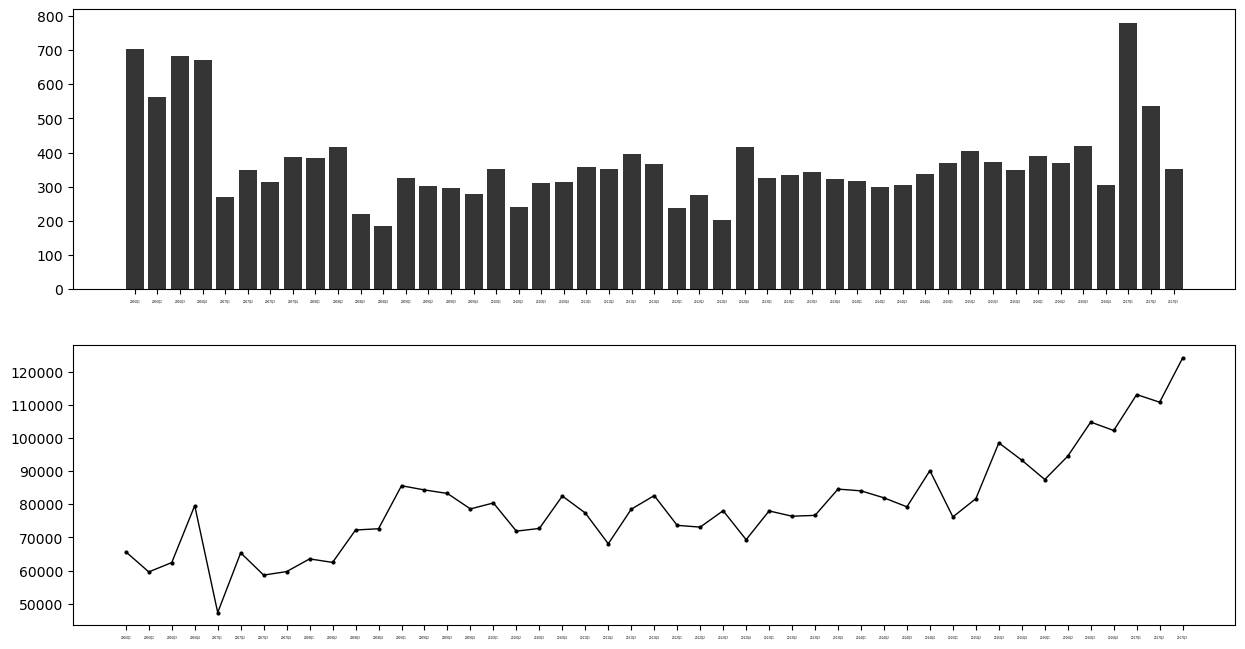

In [66]:
# Exercise 6

import matplotlib.pyplot as plt

quarters = np.array(list(quarterlyPrices.keys()))
tradingCount = [len(quarterlyPrices[quarter]) for quarter in quarters]
meanPrices = [quarterlyPrices[quarter].mean() for quarter in quarters]

fig = plt.figure(figsize=(15,8))

barPlot = fig.add_subplot(2,1,1)
barPlot.bar(quarters,tradingCount, color="#353535")

linePlot = fig.add_subplot(2,1,2)
linePlot.plot(quarters,meanPrices, "ko-", linewidth=1, markersize=2)

plt.show()